Question no.7 :- Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

Answer no.7

In [ ]:
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("/content/sample_data/meteorite_cleaned.csv")

In [5]:
dataset.head()

,name,id,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-33.16667, -64.95]"


In [6]:
dataset.isnull().sum()

name                 0
id                   0
recclass             0
mass                 0
fall                 0
year                 0
reclat               0
reclong              0
point coordinates    0
dtype: int64

In [7]:
dataset.dtypes

name                  object
id                     int64
recclass              object
mass                 float64
fall                  object
year                  object
reclat               float64
reclong              float64
point coordinates     object
dtype: object

In [8]:
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y-%m-%d', errors='coerce')

In [10]:
# Counting meteorites that fell before the year 2000
earth_meteorites_before_2000 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 2000)]

In [12]:
len(earth_meteorites_before_2000)

882

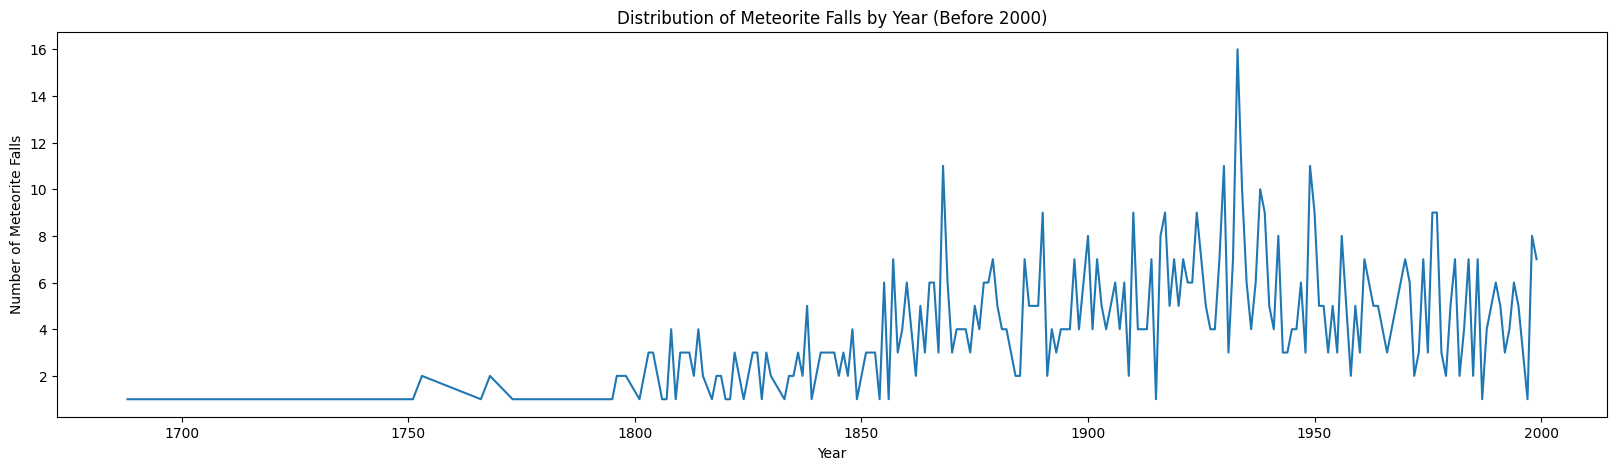

In [13]:
# Plotting the distribution of meteorite falls by year

fall_counts = earth_meteorites_before_2000['year'].dt.year.value_counts().sort_index()
plt.figure(figsize=(20, 5))
plt.plot(fall_counts.index, fall_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Falls')
plt.title('Distribution of Meteorite Falls by Year (Before 2000)')
plt.show()

In [14]:
earth_meteorites_before_1970 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 1970)]

In [15]:
# Calculating the latitude and longitude columns
coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]

In [16]:
coordinates

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
953,54.50000,35.20000
954,13.63333,79.41667
956,-7.08333,111.53333
957,-6.66667,106.58333


In [17]:
earth_meteorites_before_1970 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 1970)]

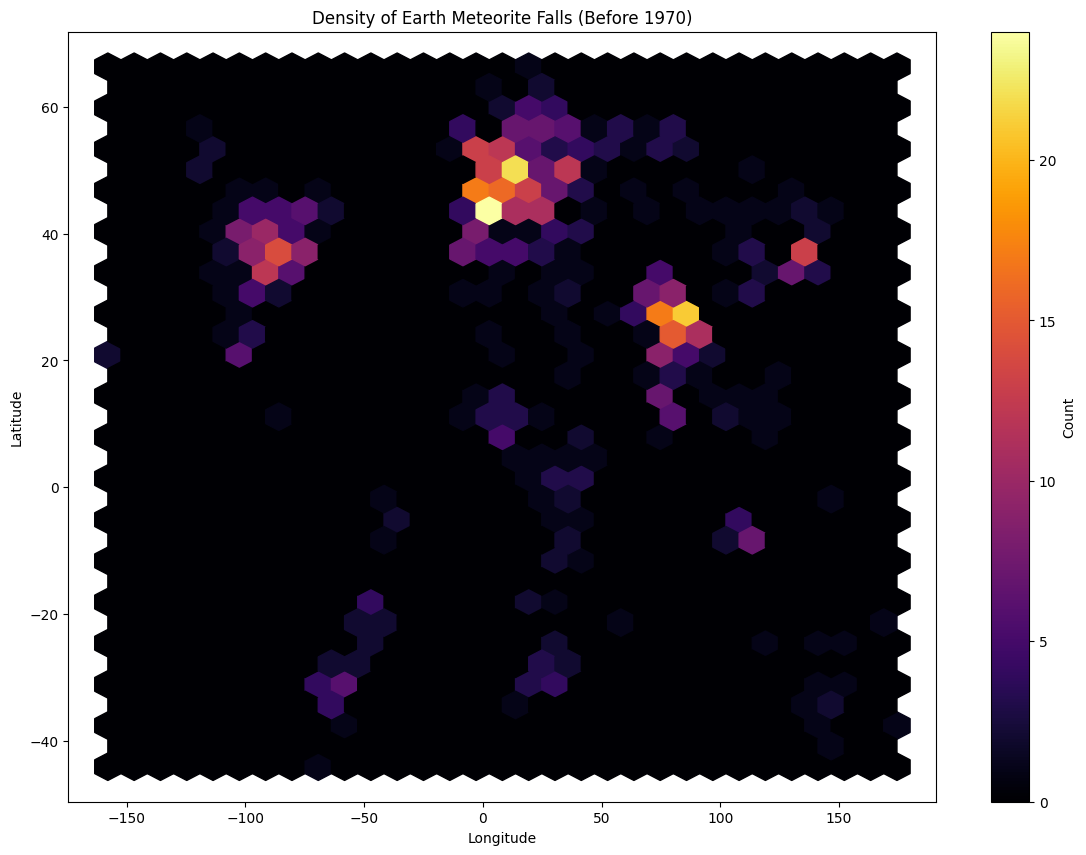

In [20]:
# Plot the density of Earth meteorite falls using hexbins

plt.figure(figsize=(14,10))
plt.hexbin(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], gridsize=30, cmap='inferno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Earth Meteorite Falls (Before 1970)')
plt.colorbar(label='Count')
plt.show()

In [21]:
earth_meteorites_above_10000kg = dataset[dataset['mass'] > 10000]

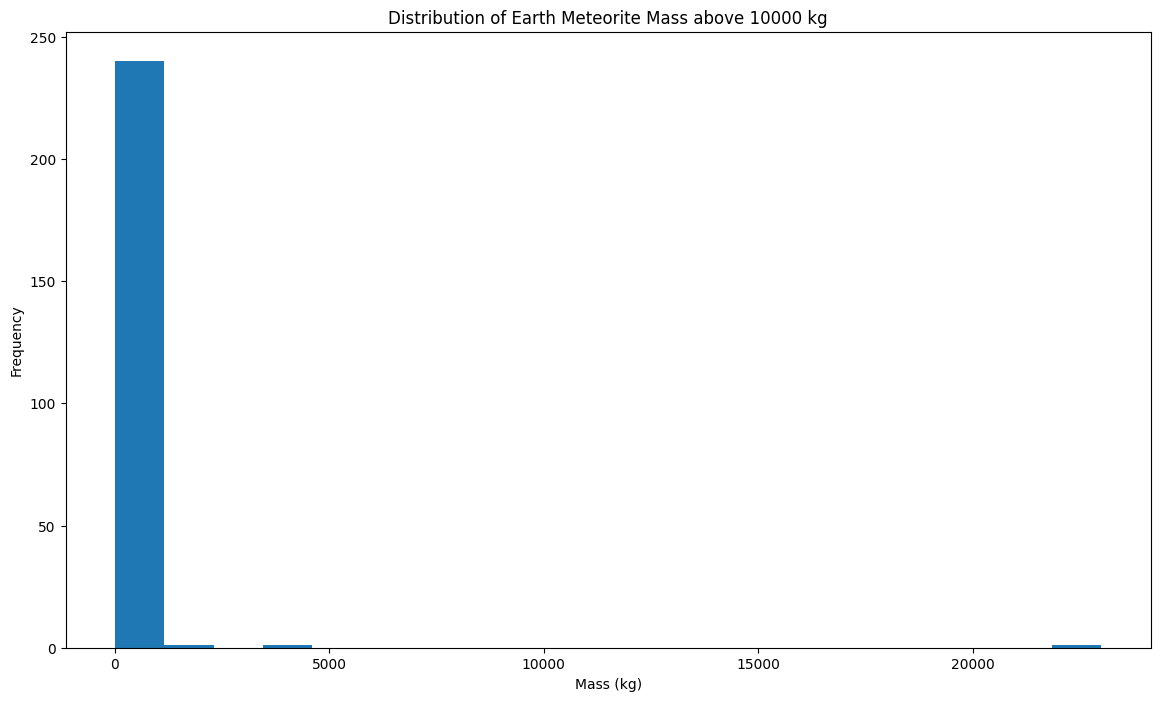

In [23]:
# Plot a histogram of the mass distribution of Earth meteorites above 10000 kg

plt.figure(figsize=(14,8))
plt.hist(earth_meteorites_above_10000kg['mass'] / 1000, bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Earth Meteorite Mass above 10000 kg')
plt.show()

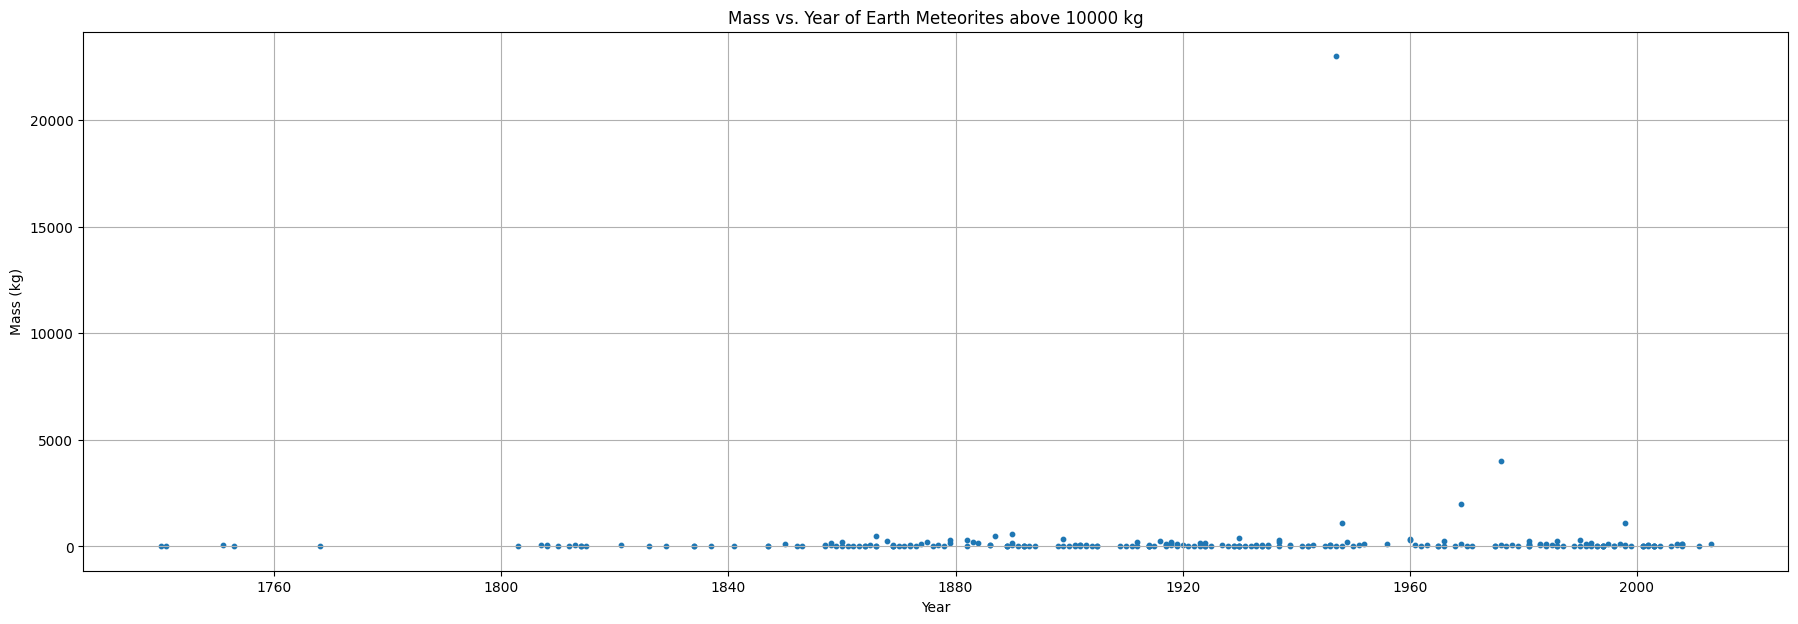

In [25]:
# Plot a scatter plot to visualize the mass vs. year of Earth meteorites above 10000 kg

plt.figure(figsize=(22, 7))
plt.scatter(earth_meteorites_above_10000kg['year'], earth_meteorites_above_10000kg['mass'] / 1000, s=10)
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Mass vs. Year of Earth Meteorites above 10000 kg')
plt.grid(True)
plt.show()